In [1]:
import pandas as pd
movies = pd.read_csv("fandango_score_comparison.csv")
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


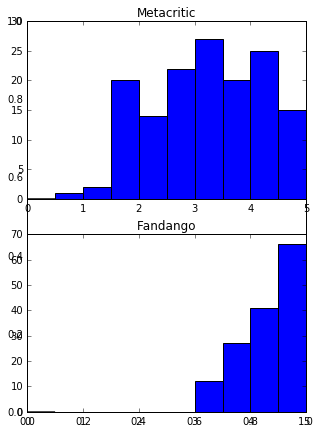

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(figsize=(5,7))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.hist(movies["Metacritic_norm_round"], 10, range=(0,5))
ax1.set_title("Metacritic")
ax2.hist(movies["Fandango_Stars"], 10, range=(0,5))
ax2.set_title("Fandango")
plt.show()

#Based on plotting histograms of normalized Metacritic scores and Fandango stars, it seems that Metacritic's most common ratings were between 3-4 while Fandango's was between 4-4.5. There are no scores below a 3 in the Fandango ratings, while there are scores as low as .5 in the Metacritics ratings.

In [3]:
mean_fandango = (sum(movies["Fandango_Stars"]) / len(movies["Fandango_Stars"]))
mean_meta = (sum(movies["Metacritic_norm_round"]) / len(movies["Metacritic_norm_round"]))

print("mean fandango: ", mean_fandango)
print("mean metacritic: ", mean_meta)

import numpy
median_fandango = numpy.median(movies["Fandango_Stars"])
median_meta = numpy.median(movies["Metacritic_norm_round"])

print("median fandango: ", median_fandango)
print("median metacritic: ", median_meta)

std_fandango = movies["Fandango_Stars"].std()
std_meta = movies["Metacritic_norm_round"].std()

print("standard dev fandango: ", std_fandango)
print("standard dev metacritic: ", std_meta)

mean fandango:  4.08904109589
mean metacritic:  2.97260273973
median fandango:  4.0
median metacritic:  3.0
standard dev fandango:  0.540385977979
standard dev metacritic:  0.990960561374


## Fandango vs. Metacritic Methodology
Based on metacritic's methodology, scores are from a weighted average (scores are given different weights based on who the source is) and are then normalized on a scale 0-100.

Fandango makes their scoring methodology harder to find on their website. Based on other sources, it seems that Fandango uses a 0-5 rating system (at .5 star increments), though clearly by the data, the trend shows that movies are typically not rated below 3.


## Fandango vs. Metacritic statistical differences

Based on a few simple statistics, fandango's mean score, median score are both 4.0 or higher. These are both above metacritic's mean and median which are 2.97 and 3, respectively. Fandango may have a higher mean and median becase of the limited range of their rating system. Metacritic has more of a range to potentially capture a normalized distribution.

The standard deviation between fandango scores is tight at .54, while metacritic's is at .99. There may be a difference here because Fandango ratings seem to begin at 3 and end at 5, while Metacritic's began as low as .5 and reach 4.5.

The median for Metacritic at 3 is slightly higher than the mean score for Metacritic at 2.9 most likely because there are more lower scores bring down the mean - the trend is ever so slighty "skewed to the left". 

Based on Fandango's mean score being more than 1 full point higher than Metacritic's mean score, there is a significant showing of higher Fandango scores.

NameError: name 'ax' is not defined

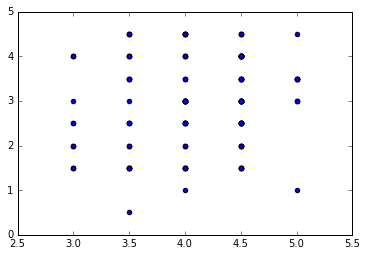

In [4]:
plt.scatter(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
ax.set_xlabel("Fandango")
ax.set_ylabel("Metacritic")
plt.show()

In [ ]:
movies["fm_diff"] = numpy.abs(movies["Fandango_Stars"] - movies["Metacritic_norm_round"])

movies.sort_values(by="fm_diff", ascending=False).head(5)

In [ ]:
from scipy.stats.stats import pearsonr
r, p = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
print(r)

## Correlation between Fandango and metacritic scores

There is a very low but positive correlation between Fandango and Metacritic scores. This shows that scores per movie are very different. As proved before, Fandango scores seem to be inflated and this weak correlation between Fandango scores and Metacritic scores show that the inflated scores differ per movie.


In [ ]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Fandango_Stars"], movies["Metacritic_norm_round"])


In [ ]:
pred_3 = 3 * slope + intercept
print(pred_3)

In [ ]:
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept

plt.scatter(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
plt.plot([1,5], [pred_1, pred_5])
plt.xlim(1,5)
plt.show()